<a href="https://colab.research.google.com/github/PedroGuedesBraga/lab_2_ri/blob/master/lab_2_ri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estatísticas da Coleção e Lei de Zipf **  - Recuperação da Informação
**Aluno: Pedro Guedes Braga **


In [99]:
#coding: utf-8

import pandas as pd
import nltk
import operator
import math
import matplotlib.pyplot as pyplot
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('stopwords')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**1 - Reproduza a tabela 4.1 do livro texto calculando as estatísticas para sua coleção (5 pts).**




In [101]:
url_csv = "https://raw.githubusercontent.com/PedroGuedesBraga/ri_lab_01/master/output/results.csv"
df = pd.read_csv(url_csv)
df.dropna(inplace=True)  ##Retira campos NA (ex.: NaN, etc)
lista_de_noticias = df.text.unique() #Retorna uma lista onde cada elemento é o texto de uma noticia.
 # http://www.nltk.org/howto/portuguese_en.html - Tutorial StopWords
 # https://pythonspot.com/tokenizing-words-and-sentences-with-nltk/
palavras_a_ignorar = nltk.corpus.stopwords.words('portuguese')
palavras_a_ignorar.append('o')
palavras_a_ignorar.append('a')
palavras_a_ignorar.append('é')
palavras_a_ignorar.append('r')
  
special_chars = [',', '.', '-', '“', "”", ")", "(", ":", "%", "?", "$", "–"]

def conta_total_palavras(lista_noticias):
  total_words = 0
  for noticia in lista_noticias:
    tokens = word_tokenize(noticia)
    for token in tokens:
      if((token not in palavras_a_ignorar) and (token not in special_chars)):
        total_words += 1
  return total_words    
  
def freq_palavras(lista_noticias):
  vocab = {}
  for noticia in lista_noticias:
    tokens = word_tokenize(noticia)
    for token in tokens:
      if((token.lower() not in palavras_a_ignorar) and (token.lower() not in special_chars)):
        if(token.lower() in vocab):
          vocab[token.lower()] = vocab[token.lower()] + 1
        else:
          vocab[token.lower()] = 1 
  return vocab

#Recebe um o numero de vezes e o vocabulario
def words_more_than(times, vocab):
  count = 0
  for word in vocab:
    if(vocab[word] > times):
      count = count + 1
  return count

def words_ocurring_once(vocab):
  count = 0
  for word in vocab:
    if(vocab[word] == 1):
      count = count + 1
  return count


vocabulario = freq_palavras(lista_de_noticias)
pd.DataFrame({'info': ['Documentos totais',
                       'Total de ocorrencias de palavras',
                      'Tamanho do Vocabulario',
                      'Palavras ocorrendo > 1000 vezes',
                       'Palavras ocorrendo uma única vez'
                      ],
              'valor': [len(df), 
                        conta_total_palavras(lista_de_noticias),
                        len(vocabulario),
                        words_more_than(1000, vocabulario),
                        words_ocurring_once(vocabulario)
                       ]
             })

,info,valor
0,Documentos totais,139
1,Total de ocorrencias de palavras,41879
2,Tamanho do Vocabulario,11968
3,Palavras ocorrendo > 1000 vezes,0
4,Palavras ocorrendo uma única vez,6943


**2 - Reproduza a tabela 4.2 do livro considerando as top-50 palavras mais frequentes de sua coleção (5 pts). **


In [102]:
sorted_d = sorted(vocabulario.items(), key=operator.itemgetter(1), reverse = True)
total_palavras = conta_total_palavras(lista_de_noticias)
freq_relativa = [(v/total_palavras) for (k,v) in sorted_d[:50]]


#Calcula o valor da constante 'c' == Pr*r
def get_constants_values(freqs_relativas):
  constants_values = []
  for i in range(len(freqs_relativas)):
    c_value = freqs_relativas[i] * (i+1)
    constants_values.append(c_value)
  return constants_values


pd.DataFrame({
    'word': [k for (k,v) in sorted_d[:50]],
    'freq': [v for (k,v) in sorted_d[:50]],
    'Pr(%)': [round((v/total_palavras)*100, 2) for (k,v) in sorted_d[:50]],
    'Pr.r': get_constants_values(freq_relativa)
    
})

,word,freq,Pr(%),Pr.r
0,ser,179,0.43,0.004274
1,brasil,175,0.42,0.008357
2,bolsonaro,172,0.41,0.012321
3,anos,172,0.41,0.016428
4,governo,170,0.41,0.020297
5,sobre,129,0.31,0.018482
6,presidente,127,0.30,0.021228
7,país,114,0.27,0.021777
8,lula,111,0.27,0.023854
9,política,106,0.25,0.025311


**3 - Plote curvas de rank-frequência (usando escala logarítmica) para palavras e bigramas na coleção que você coletou na atividade anterior. Quais os melhores valores do parâmetro c para cada curva (5 pts)?**


Text(0, 0.5, 'freq')

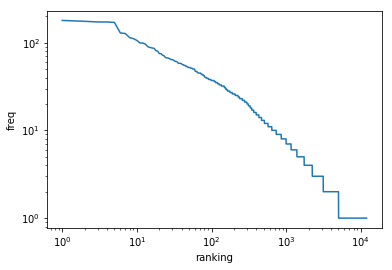

In [103]:
freq = [v for (k,v) in sorted_d] # Lista de frequencias
ranking_list = [x+1 for x in range(len(freq))]
pyplot.plot(ranking_list, freq)
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.xlabel('ranking')
pyplot.ylabel('freq')

**4 - Reproduza a tabela 4.5 do livro texto considerando a sua coleção (5 pts).**

In [104]:
number_of_unique_words = len(sorted_d)

def words_quantity_occurred_at(time): # Pega a quantidade de palavras que ocorreram 'time' vezes - Ex.: Time == 5, pega quantidade de palavras que ocorreram 5 vezes.
  counter = 0
  for (word, quantity) in sorted_d:
    if(quantity == time):
      counter = counter + 1
  return counter

number_of_ocurrences = [x for x in range(1, 11)]
pred_proportion = [round(1/(x*(x+1)), 3) for x in number_of_ocurrences]
actual_proportion = [round(words_quantity_occurred_at(x)/number_of_unique_words, 3) for x in number_of_ocurrences]
actual_number_of_words = [words_quantity_occurred_at(x) for x in number_of_ocurrences]


pd.DataFrame({
    'Number of occurrences': number_of_ocurrences,
    'Predicted proportion': pred_proportion,
    'Actual proportion': actual_proportion,
    'Actual number of words': actual_number_of_words
})

,Number of occurrences,Predicted proportion,Actual proportion,Actual number of words
0,1,0.500,0.580,6943
1,2,0.167,0.158,1891
2,3,0.083,0.075,901
3,4,0.050,0.041,494
4,5,0.033,0.029,348
5,6,0.024,0.019,229
6,7,0.018,0.014,166
7,8,0.014,0.012,139
8,9,0.011,0.010,123
9,10,0.009,0.008,93
